In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.Seq import Seq
import bioinfo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
df = bioinfo.gen_df("./data/TRIM5ALPHA_complete_PopSet")

In [3]:
df_total = pd.DataFrame()

for i in range(17):    
    b = bioinfo.gen_df2(df['Species'][i],df['Sequence'][i],3)
    y = np.empty(len(b.index))
    y[:] = i
    b['label'] = y
    b.reset_index(drop=True, inplace=True)
    df_total.reset_index(drop=True, inplace=True)
    df_total = pd.concat([df_total,b], axis=0)   


In [4]:
feat_cols = list(filter(lambda col: col != 'Fragment' and col != 'label',df_total.columns))


x = df_total.loc[:, feat_cols].values
y = df_total.loc[:, feat_cols].values

In [5]:
x = StandardScaler().fit_transform(x)

In [6]:
pca = PCA(n_components=2)
    
principalComponents = pca.fit_transform(x)
    
principalDf = pd.DataFrame(data = principalComponents, 
            columns = ['principal component 1', 'principal component 2'])

In [7]:
principalComponents

array([[-0.91609031, -2.68798486],
       [-1.77402001, -0.18263759],
       [ 4.20717615,  1.15787671],
       ...,
       [-0.40823521,  2.98993916],
       [-2.91243055, -2.80001799],
       [-0.55009077, -1.68297359]])

In [8]:
labels = df_total[['label']]
labels = labels.reset_index(drop=True)

/usr/lib/python3.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


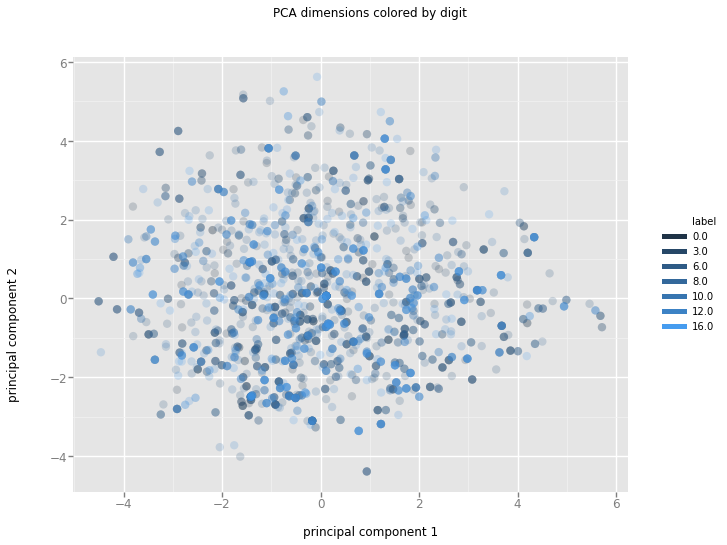

<ggplot: (-9223363260474084348)>

In [9]:
from ggplot import *

df_pca = pd.concat([principalDf,labels],axis = 1)

chart = ggplot( df_pca, aes(x='principal component 1', y='principal component 2', color='label') ) \
        + geom_point(size=70,alpha=0.2) \
        + ggtitle("PCA dimensions colored by digit")
chart

In [1]:
db = DBSCAN(eps=0.3, min_samples=10).fit(principalComponents)

NameError: name 'DBSCAN' is not defined

In [11]:
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [12]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

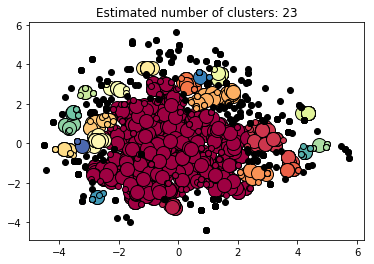

In [14]:
%matplotlib inline 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = principalComponents[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = principalComponents[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

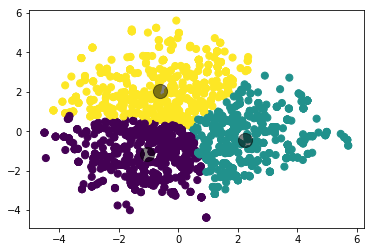

In [16]:
bioinfo.kmeans_plot(principalComponents,3)